Overall error is  0.216412605207759


TypeError: '<' not supported between instances of 'list' and 'float'

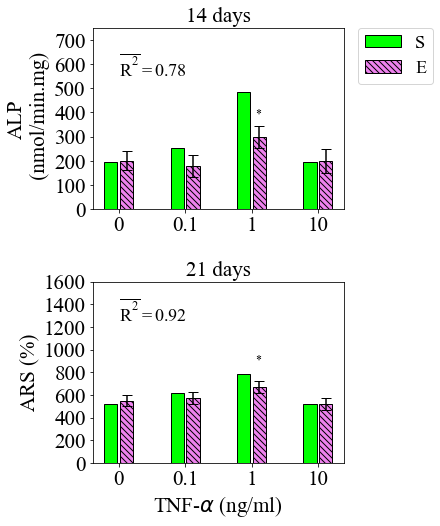

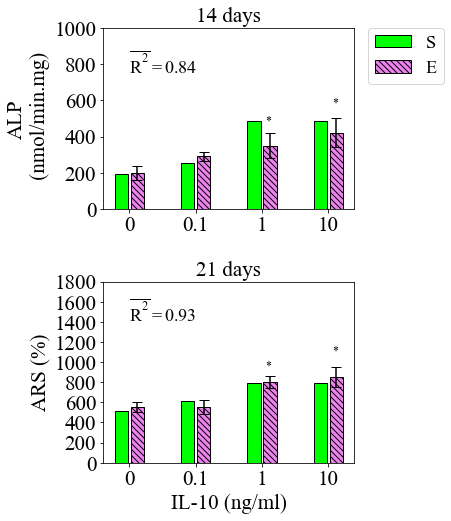

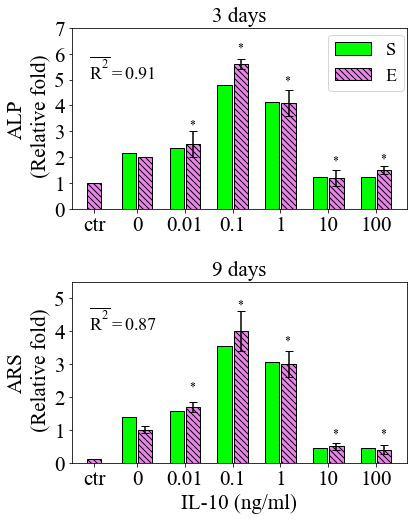

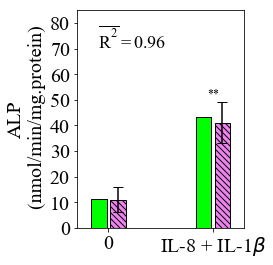

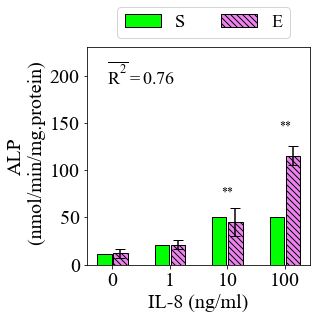

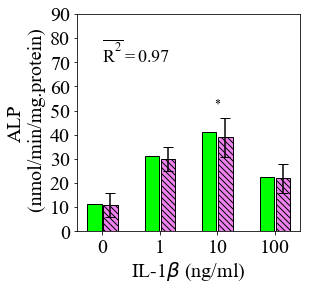

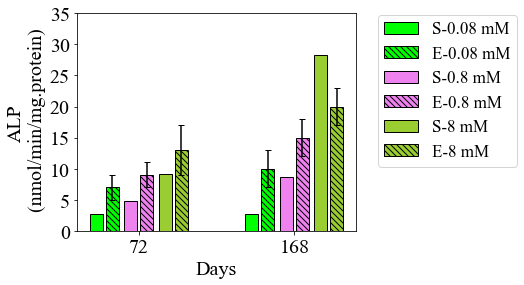

In [112]:
import sys
import pathlib
import os
import importlib
current_file = '/Users/matin/Downloads/testProjs/MSC_M/scripts'
dir_to_dirs = os.path.join(current_file,'..')
sys.path.insert(0,dir_to_dirs)
from dirs import dir_to_MSC_osteogenesis
sys.path.insert(0,dir_to_MSC_osteogenesis)
import MSC_osteogenesis 
import json
import plots
import parameters
import numpy as np 
importlib.reload(plots)
importlib.reload(parameters)
importlib.reload(MSC_osteogenesis)
def results_file(study):
	file = None
	if study == 'Qiao_2021_Mg':
		file = 'inferred_params_0_200.json'
	elif study == 'All':
		file = 'inferred_params_0_200.json'
	return file

class settings:
	# study = 'Qiao_2021_Mg'
	study = 'All'
	results_folder = os.path.join(dir_to_dirs,'raw_results',study)
	results_file = os.path.join(results_folder,results_file(study))
	output_folder = results_folder
		

def rearrange_errors(errors,targets):
#     print(errors)
#     print(targets)
    target_errors = {}
    for target in targets:
        target_error_list = []
        for ID,ID_error in errors.items():
            target_error_list.append(ID_error[target])
        target_errors[target] = np.mean(target_error_list)
    return target_errors
    
##/ run test simultions and plot

with open(os.path.join(settings.results_file)) as file:
    inferred_params = json.load(file)
# inferred_params['a_late_diff_inhib'] = 10
all_studies_flag = False
obs,_ = parameters.specifications(settings.study)

obj = MSC_osteogenesis.MSC_model(fixed_params=parameters.fixed_params,free_params = inferred_params,observations=obs, debug=False)
simulation_results = obj.simulate_studies()
study_errors = obj.cost_studies(simulation_results)

error = obj.run()

print('Overall error is ',error)

for study in obs['studies']:
    targets = list(obs[study]['measurement_scheme'].keys())
    study_error = rearrange_errors(study_errors[study],targets)
    if study == 'Qiao_2021_Mg' or study == 'Ber_2016':
        plot_obj = plots.Plot_bar_2(study=study,observations=obs,errors=study_error,destination = settings.output_folder)
    else:
        plot_obj = plots.Plot_bar(study=study,observations=obs,errors=study_error,destination = settings.output_folder)
    plot_obj.plot(simulation_results[study])
